In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('ggplot')

## Statistical Analysis
from scipy import stats
from scipy.stats import norm,skew

# Display all Columns
pd.set_option('display.max_columns', None)

# Ignore Warnings
import warnings

In [ ]:
# Import the train and test data.
train = pd.read_csv('/content/drive/MyDrive/dataset/merged_file.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
train.head()

<ipython-input-3-2dc5678e2d3b>:2: DtypeWarning: Columns (1,6,10,11,17,18,19,20,21,34,36,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/MyDrive/dataset/merged_file.csv')


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.52256,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.70528,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.09821,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [ ]:
## Information of the train Dataset.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26084 entries, 0 to 26083
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Patient Id                                        26084 non-null  object
 1   Patient Age                                       24441 non-null  object
 2   Genes in mother's side                            26084 non-null  object
 3   Inherited from father                             25710 non-null  object
 4   Maternal gene                                     22367 non-null  object
 5   Paternal gene                                     26084 non-null  object
 6   Blood cell count (mcL)                            26084 non-null  object
 7   Patient First Name                                26084 non-null  object
 8   Family Name                                       16324 non-null  object
 9   Father's name               

<Axes: >

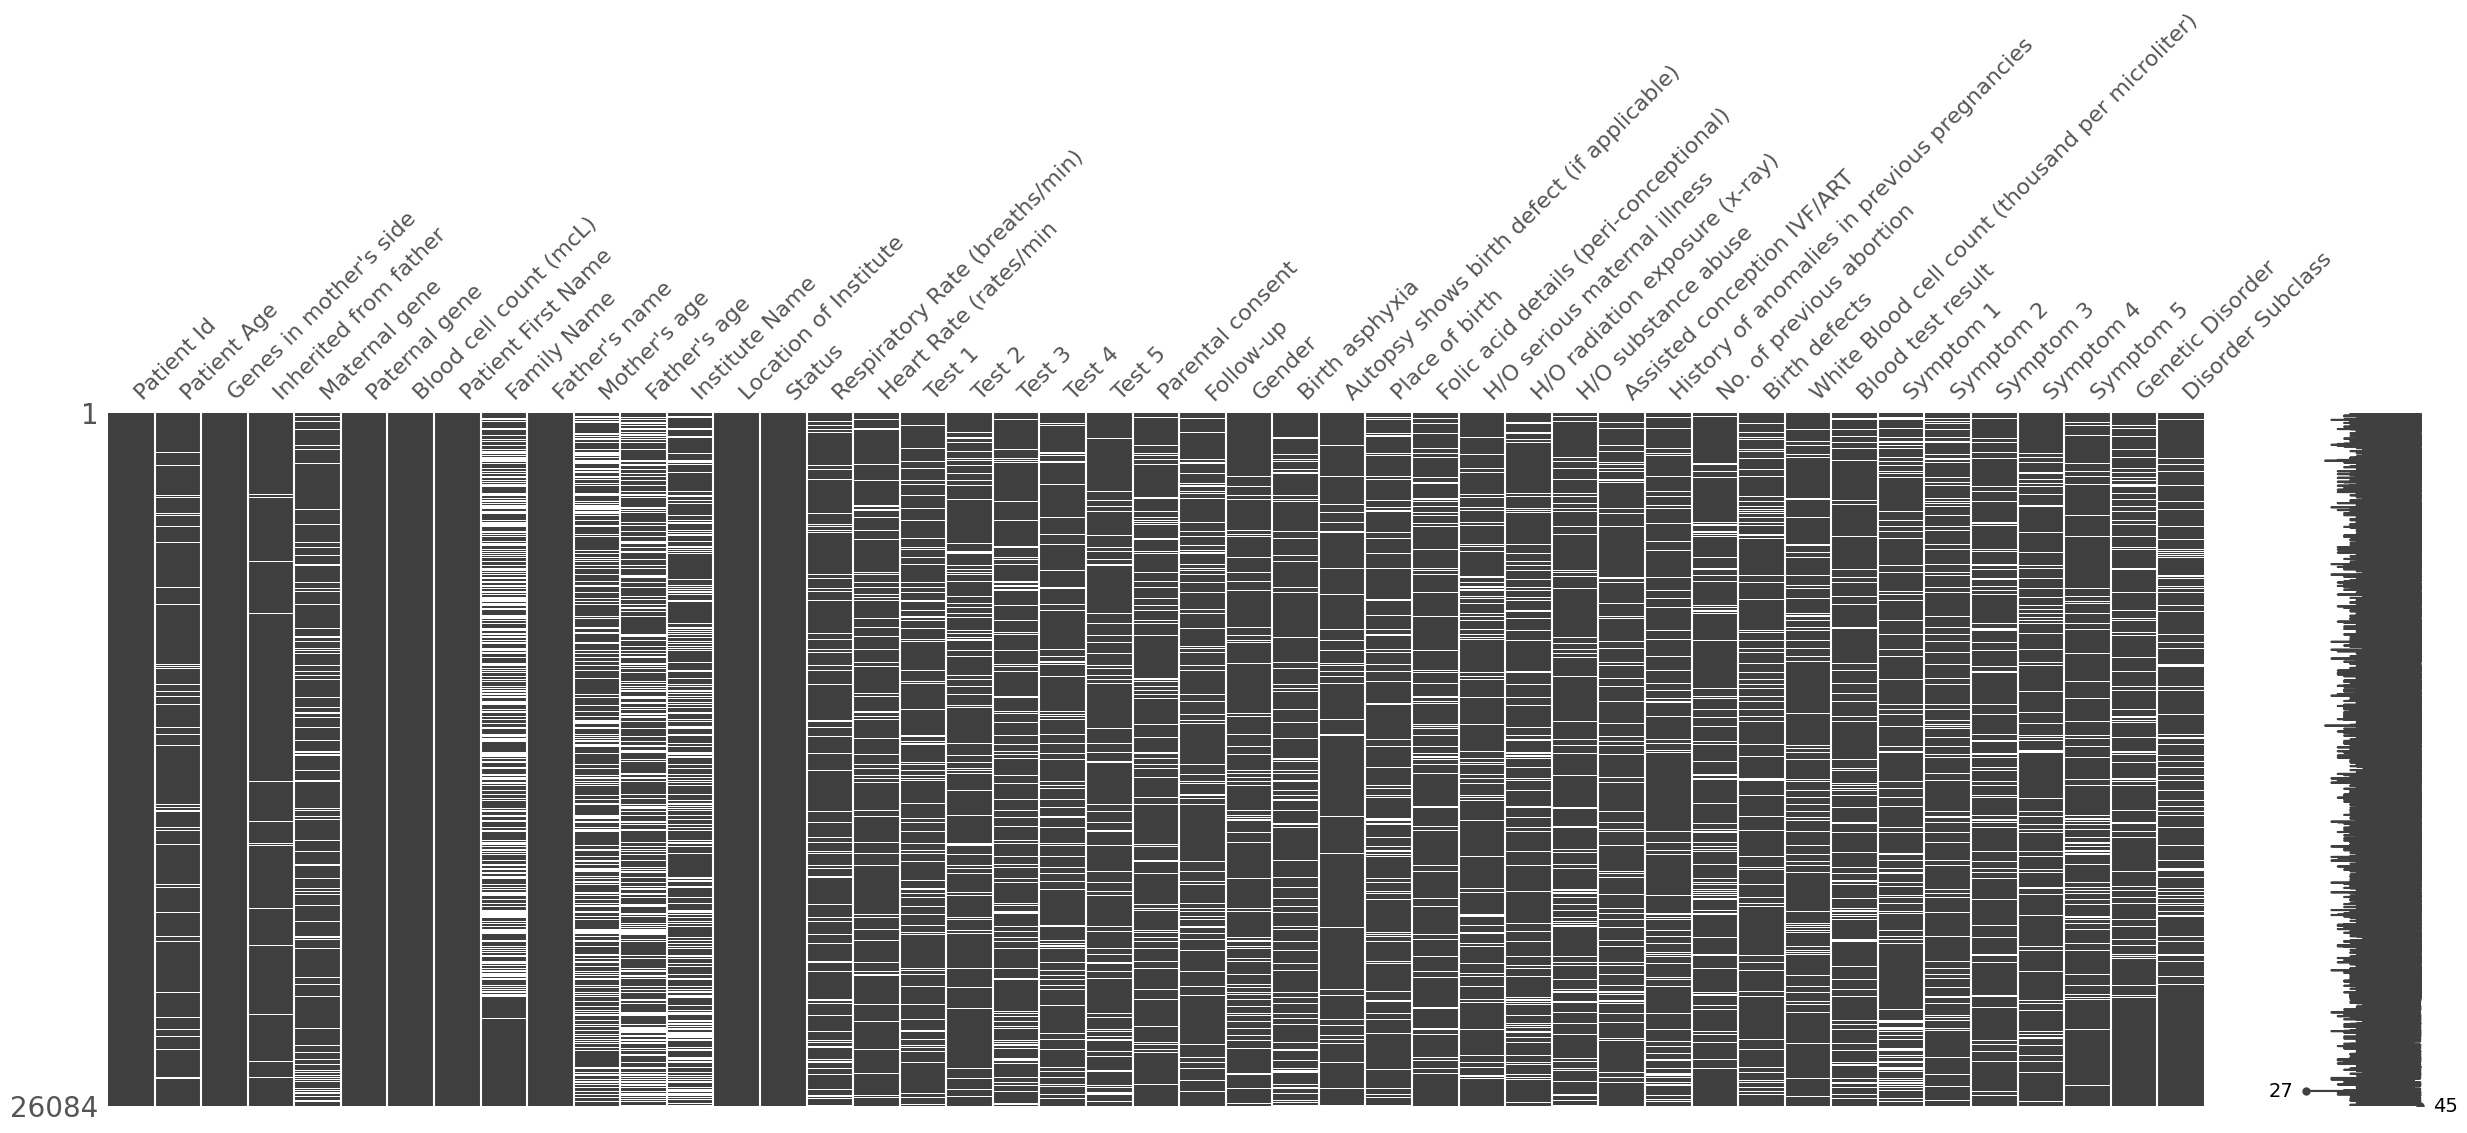

In [ ]:
# To plot a graphic of missing values
missingno.matrix(train,figsize=(30,9))

In [ ]:
# Understanding more about the missing value columns

def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()

    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis= 1)

    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values(
        '% of Total Values', ascending= False).round(1) #Review
    print("Your selected dataset has " + str(df.shape[1]) + " columns and " + str(len(df)) + " observations.\n"
         "\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(train)

Your selected dataset has 45 columns and 26084 observations.

 There are 37 columns that have missing values.


,Missing Values,% of Total Values
Family Name,9760,37.4
Mother's age,7465,28.6
Father's age,7274,27.9
Institute Name,6489,24.9
Maternal gene,3717,14.3
Symptom 1,3168,12.1
Test 3,2939,11.3
History of anomalies in previous pregnancies,2868,11.0
Respiratory Rate (breaths/min),2739,10.5
H/O substance abuse,2711,10.4


In [ ]:
## Unique Categories
train["Disorder Subclass"].unique()

array(["Leber's hereditary optic neuropathy", 'Cystic fibrosis',
       'Diabetes', 'Leigh syndrome', 'Cancer', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', nan, "Alzheimer's",
       'Disorder Subclass', 'No disorder'], dtype=object)

Leigh syndrome                         5160
Mitochondrial myopathy                 4405
No disorder                            4000
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Disorder Subclass                         1
Name: Disorder Subclass, dtype: int64


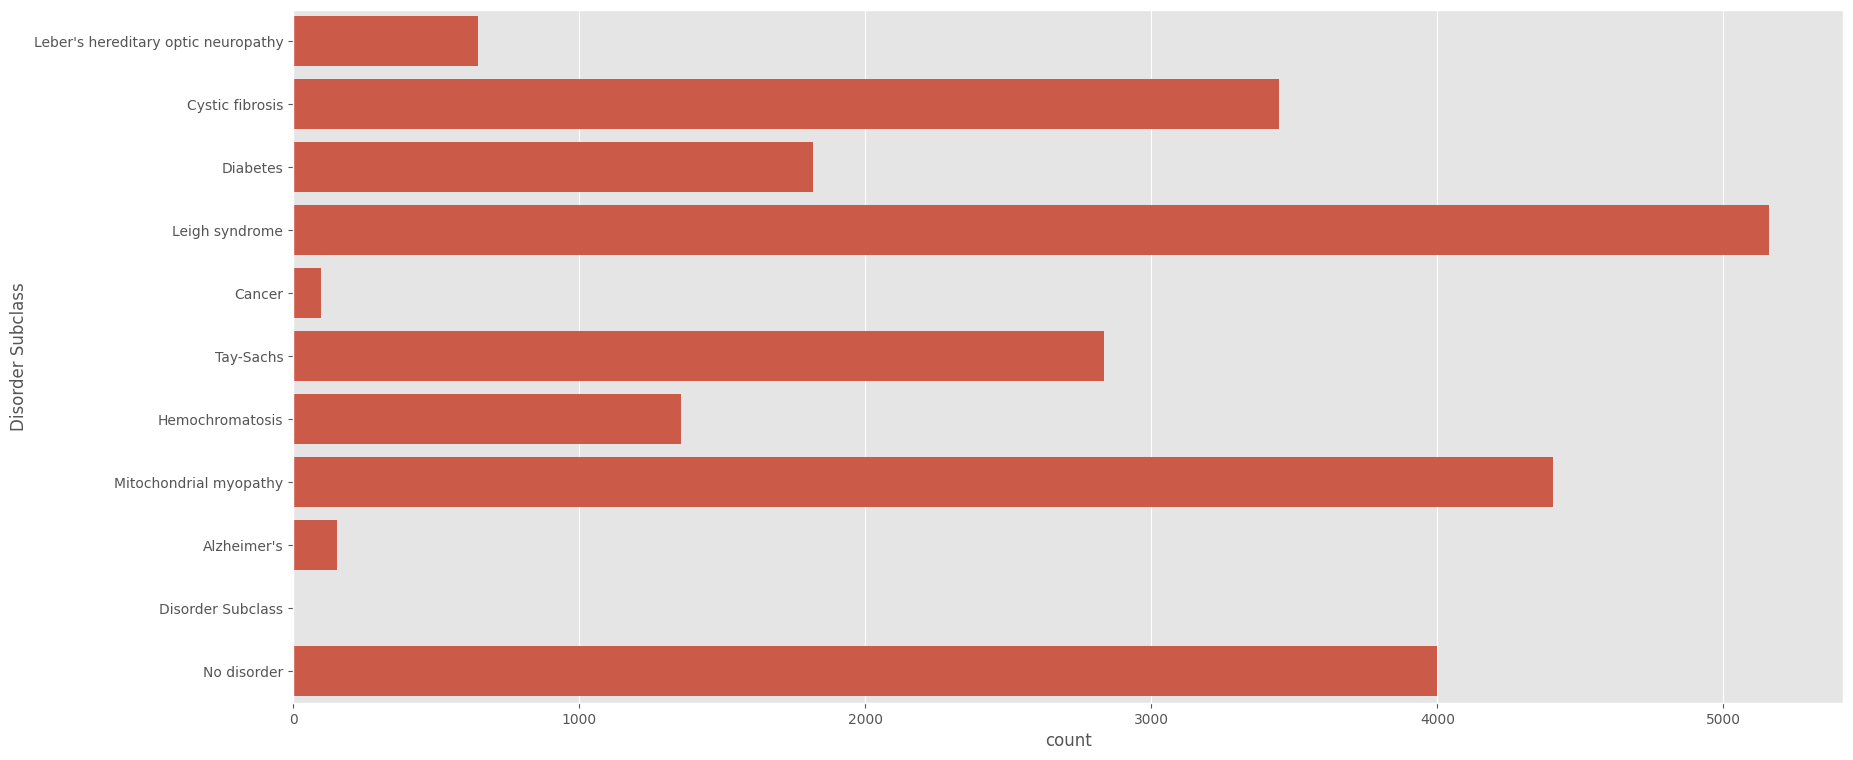

In [ ]:
# Understanding Disorder Subclass details
fig = plt.figure(figsize=(20,9))
sns.countplot(y= "Disorder Subclass",data= train)

print(train["Disorder Subclass"].value_counts())


In [ ]:
## Understanding the Division of Genetic Disorders.
table1 = pd.pivot_table(train, index= ['Genetic Disorder', 'Disorder Subclass'], values= 'Patient Age', aggfunc= np.mean)
table1


<ipython-input-9-65dbd22b2be0>:2: FutureWarning: The operation <function mean at 0x7f6292763010> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  table1 = pd.pivot_table(train, index= ['Genetic Disorder', 'Disorder Subclass'], values= 'Patient Age', aggfunc= np.mean)


Empty DataFrame
Columns: []
Index: [(Genetic Disorder, Disorder Subclass), (Mitochondrial genetic inheritance disorders, Leber's hereditary optic neuropathy), (Mitochondrial genetic inheritance disorders, Leigh syndrome), (Mitochondrial genetic inheritance disorders, Mitochondrial myopathy), (Multifactorial genetic inheritance disorders, Alzheimer's), (Multifactorial genetic inheritance disorders, Cancer), (Multifactorial genetic inheritance disorders, Diabetes), (No disorder, No disorder), (Single-gene inheritance diseases, Cystic fibrosis), (Single-gene inheritance diseases, Hemochromatosis), (Single-gene inheritance diseases, Tay-Sachs)]

In [ ]:
# Obtaining the Categorical Columns
categorical_features = [features for features in train.columns if train[features].dtypes == 'O']
categorical_features

['Patient Id',
 'Patient Age',
 "Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Blood cell count (mcL)',
 'Patient First Name',
 'Family Name',
 "Father's name",
 "Mother's age",
 "Father's age",
 'Institute Name',
 'Location of Institute',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Test 1',
 'Test 2',
 'Test 3',
 'Test 4',
 'Test 5',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'No. of previous abortion',
 'Birth defects',
 'White Blood cell count (thousand per microliter)',
 'Blood test result',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5',
 'Genetic Disorder',
 'Disorder Subclass']

In [ ]:
train.head(35)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.52256,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.70528,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.09821,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,NaN,NaN,Massachusetts General Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,NaN,Normal,0.0,0.0,0.0,1.0,0.0,Yes,Low,Female,Not available,None,Institute,No,No,No,No,NaN,No,0.0,Multiple,10.27223,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,PID0x28de,3.0,Yes,No,Yes,Yes,4.90108,Mary,NaN,Aydun,NaN,63.0,Not applicable,-,Alive,Normal (30-60),NaN,NaN,0.0,0.0,1.0,0.0,NaN,Low,Male,No record,Not applicable,Home,NaN,Yes,No,Not applicable,Yes,No,3.0,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,PID0x4f8f,3.0,No,No,Yes,Yes,4.964816,Emma,Bryant,Keng,40.0,NaN,Not applicable,-,Alive,Tachypnea,Normal,0.0,0.0,NaN,1.0,0.0,Yes,Low,NaN,No record,Not applicable,Home,Yes,Yes,No,-,No,Yes,1.0,Singular,9.836352,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,45.0,44.0,Lemuel Shattuck Hospital,"125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,Male,Yes,Not applicable,Institute,Yes,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,44.0,42.0,Shriners Burns Institute,"1200 Centre St\nRoslindale, MA 02131\n(

In [ ]:
pip install seaborn


In [ ]:
train['Patient Age'].describe()

count     24441.0
unique       46.0
top          12.0
freq       1066.0
Name: Patient Age, dtype: float64

In [ ]:
# Convert 'Patient Age' column to numeric
train['Patient Age'] = pd.to_numeric(train['Patient Age'], errors='coerce')

# Filling the Missing Values with the Average Mean
train['Patient Age'].fillna(round(train['Patient Age'].mean()), inplace=True)


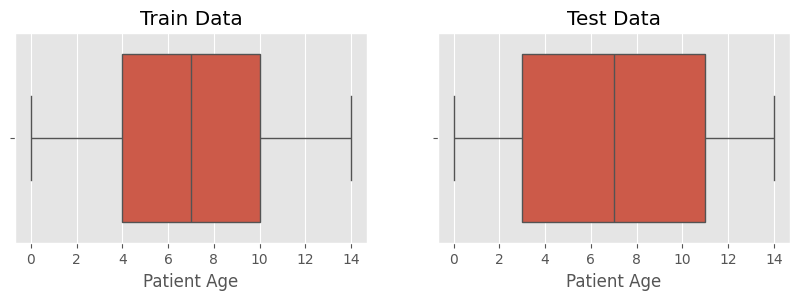

In [ ]:
## Checking for Outliers
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.boxplot(x= 'Patient Age', data= train)
plt.title('Train Data')
plt.subplot(2,2,2)
sns.boxplot(x= 'Patient Age', data= test)
plt.title('Test Data')

plt.show()


In [ ]:

train['Inherited from father'].unique()

array(['No', 'Yes', nan, 'Inherited from father'], dtype=object)

In [ ]:
## Filling Missing Values with 'No'
#### train['Inherited from father'].fillna('No', inplace= True)
#### test['Inherited from father'].fillna('No', inplace= True)

### Train Data
for i in range(0,21805):
    if (train['Inherited from father'].isnull()[i] == True):
        if (train['Paternal gene'][i] == "Yes"):
          train['Inherited from father'][i] = 'Yes'
        elif (train['Paternal gene'][i] == "No"):
          train['Inherited from father'][i] = 'No'
        else:
          train['Inherited from father'][i] = 'No'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Inherited from father'].isnull()[i] == True):
        if (test['Paternal gene'][i] == "Yes"):
          test['Inherited from father'][i] = 'Yes'
        elif (test['Paternal gene'][i] == "No"):
          test['Inherited from father'][i] = 'No'
        else:
          test['Inherited from father'][i] = 'No'
    else:
      continue

<ipython-input-19-b421b1314be1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Inherited from father'][i] = 'No'
<ipython-input-19-b421b1314be1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Inherited from father'][i] = 'Yes'
<ipython-input-19-b421b1314be1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Inherited from father'][i] = 'No'
<ipython-input-19-b421b1314be1>:22: SettingWithCopyWarning: 
A value is

In [ ]:
train['Maternal gene'].unique()

array(['Yes', 'No', nan, 'Maternal gene'], dtype=object)

In [ ]:
# Train Data
for i in range(0, 21805):
    if pd.isnull(train['Maternal gene'][i]):
        if train["Genes in mother's side"][i] == "Yes":
            train.loc[i, 'Maternal gene'] = 'Yes'
        elif train["Genes in mother's side"][i] == "No":
            train.loc[i, 'Maternal gene'] = 'No'
        else:
            train.loc[i, 'Maternal gene'] = 'No'

# Test Data
for i in range(0, 9465):
    if pd.isnull(test['Maternal gene'][i]):
        if test["Genes in mother's side"][i] == "Yes":
            test.loc[i, 'Maternal gene'] = 'Yes'
        elif test["Genes in mother's side"][i] == "No":
            test.loc[i, 'Maternal gene'] = 'No'
        else:
            test.loc[i, 'Maternal gene'] = 'No'


[4.760603085632425 4.910669059571037 4.8932974275730095 ... '4.889699951'
 '4.803996617' '5.183852279']


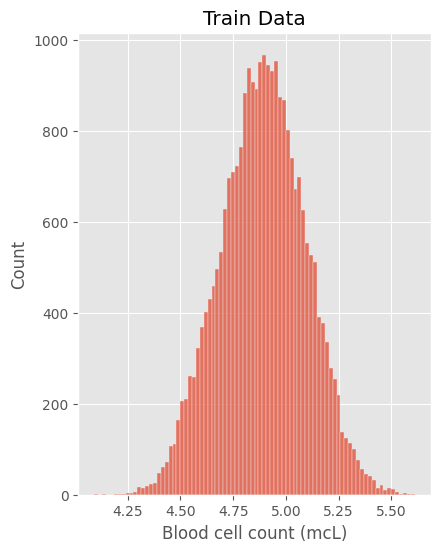

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check unique values in the 'Blood cell count (mcL)' column
print(train['Blood cell count (mcL)'].unique())

# Clean the data by removing non-numeric values or replacing them with appropriate values
# Assuming 'Blood cell count (mcL)' should contain numeric values, we'll convert it to numeric type
train['Blood cell count (mcL)'] = pd.to_numeric(train['Blood cell count (mcL)'], errors='coerce')

# Drop NaN values if any
train.dropna(subset=['Blood cell count (mcL)'], inplace=True)

# Plot the distribution
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(train['Blood cell count (mcL)'])
plt.title('Train Data')

plt.show()


In [ ]:
# Train Dataset
mean = train['Blood cell count (mcL)'].mean()
std = train['Blood cell count (mcL)'].std()

Upper_Bound = mean + (3 * std)
Lower_Bound = mean - (3 * std)

train.loc[train['Blood cell count (mcL)'] < Lower_Bound, 'Blood cell count (mcL)'] = Lower_Bound
train.loc[train['Blood cell count (mcL)'] > Upper_Bound, 'Blood cell count (mcL)'] = Upper_Bound

# Test Dataset
mean = test['Blood cell count (mcL)'].mean()
std = test['Blood cell count (mcL)'].std()

Upper_Bound = mean + (3 * std)
Lower_Bound = mean - (3 * std)

test.loc[test['Blood cell count (mcL)'] < Lower_Bound, 'Blood cell count (mcL)'] = Lower_Bound
test.loc[test['Blood cell count (mcL)'] > Upper_Bound, 'Blood cell count (mcL)'] = Upper_Bound


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'train' and 'test' dataframes are already defined

# Fill missing values in 'Heart Rate (rates/min)' column
train['Heart Rate (rates/min'] = pd.to_numeric(train['Heart Rate (rates/min'], errors='coerce')

# Create a boolean Series based on the condition
condition_train = train["Respiratory Rate (breaths/min)"] == "Normal (30-60)"

# Create a Series of the same length with the desired values
values_train = pd.Series(['Normal', 'Tachycardia']).repeat(len(train))

# Use np.where to fill the missing values
train.loc[train['Heart Rate (rates/min'].isnull(), 'Heart Rate (rates/min)'] = np.where(condition_train, values_train[0], values_train[1])

# Fill missing values in test dataframe
test['Heart Rate (rates/min'] = pd.to_numeric(test['Heart Rate (rates/min'], errors='coerce')

# Create a boolean Series based on the condition for test dataframe
condition_test = test["Respiratory Rate (breaths/min)"] == "Normal (30-60)"

# Create a Series of the same length with the desired values for test dataframe
values_test = pd.Series(['Normal', 'Tachycardia']).repeat(len(test))



# Print first few rows of the updated dataframes
print(train.head())



  Patient Id Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418         2.0                    Yes                    No   
1  PID0x25d5         4.0                    Yes                   Yes   
2  PID0x4a82         6.0                    Yes                    No   
3  PID0x4ac8        12.0                    Yes                    No   
4  PID0x1bf7        11.0                    Yes                    No   

  Maternal gene Paternal gene Blood cell count (mcL) Patient First Name  \
0           Yes            No               4.760603            Richard   
1            No            No               4.910669               Mike   
2            No            No               4.893297           Kimberly   
3           Yes            No                4.70528            Jeffery   
4           NaN           Yes               4.720703            Johanna   

  Family Name Father's name  Mother's age  Father's age  \
0         NaN         Larre          35.0          

In [ ]:
import pandas as pd
import numpy as np

# Read the data
train = pd.read_csv('/content/drive/MyDrive/dataset/merged_file.csv')
#test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

# Fill missing values in 'Mother's age' and 'Father's age' columns with the average mean
train["Mother's age"] = pd.to_numeric(train["Mother's age"], errors='coerce')
train["Mother's age"].fillna(round(train["Mother's age"].mean()), inplace=True)

train["Father's age"] = pd.to_numeric(train["Father's age"], errors='coerce')
train["Father's age"].fillna(round(train["Father's age"].mean()), inplace=True)

# Fill missing values in 'Respiratory Rate (breaths/min)' column based on 'Status'
train.loc[(train['Respiratory Rate (breaths/min)'].isnull()) & (train["Status"] == "Alive"), 'Respiratory Rate (breaths/min)'] = 'Normal (30-60)'
train.loc[(train['Respiratory Rate (breaths/min)'].isnull()) & (train["Status"] != "Alive"), 'Respiratory Rate (breaths/min)'] = 'Tachypnea'

#test['Respiratory Rate (breaths/min)'].replace('-99', np.nan, inplace=True)
#test.loc[(test['Respiratory Rate (breaths/min)'].isnull()) & (test["Status"] == "Alive"), 'Respiratory Rate (breaths/min)'] = 'Normal (30-60)'
#test.loc[(test['Respiratory Rate (breaths/min)'].isnull()) & (test["Status"] != "Alive"), 'Respiratory Rate (breaths/min)'] = 'Tachypnea'

# Fill missing values in 'Heart Rate (rates/min)' column
train['Heart Rate (rates/min'] = pd.to_numeric(train['Heart Rate (rates/min'], errors='coerce')
train.loc[(train['Heart Rate (rates/min'].isnull()), 'Heart Rate (rates/min'] = np.where(train["Respiratory Rate (breaths/min)"] == "Normal (30-60)", 'Normal', 'Tachycardia')

#test['Heart Rate (rates/min'] = pd.to_numeric(test['Heart Rate (rates/min'], errors='coerce')
#test.loc[(test['Heart Rate (rates/min'].isnull()), 'Heart Rate (rates/min'] = np.where(test["Respiratory Rate (breaths/min)"] == "Normal (30-60)", 'Normal', 'Tachycardia')

# Print first few rows of the updated dataframes
print(train.head())
#print(test.head())



  Patient Id Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418         2.0                    Yes                    No   
1  PID0x25d5         4.0                    Yes                   Yes   
2  PID0x4a82         6.0                    Yes                    No   
3  PID0x4ac8        12.0                    Yes                    No   
4  PID0x1bf7        11.0                    Yes                    No   

  Maternal gene Paternal gene Blood cell count (mcL) Patient First Name  \
0           Yes            No               4.760603            Richard   
1            No            No               4.910669               Mike   
2            No            No               4.893297           Kimberly   
3           Yes            No                4.70528            Jeffery   
4           NaN           Yes               4.720703            Johanna   

  Family Name Father's name  Mother's age  Father's age  \
0         NaN         Larre          35.0          

<ipython-input-38-d9615e64e887>:5: DtypeWarning: Columns (1,6,10,11,17,18,19,20,21,34,36,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/MyDrive/dataset/merged_file.csv')


In [ ]:
train.drop(columns= ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'], inplace= True)
test.drop(columns= ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'], inplace= True)


In [ ]:
##Filling Missing Values with 'No'
train['Parental consent'].fillna('No', inplace= True)
test['Parental consent'].replace('-99', np.nan, inplace= True)
test['Parental consent'].fillna('No', inplace= True)

In [ ]:

# This loop is for Train Data.
for i in range(0,21805):
    if (train['Follow-up'].isnull()[i] == True):
        if (train['Respiratory Rate (breaths/min)'][i] == "Tachypnea"):
          train['Follow-up'][i] = 'High'
        elif (train['Heart Rate (rates/min'][i] == "Tachycardia"):
          train['Follow-up'][i] = 'High'
        else:
          train['Follow-up'][i] = 'Low'
    else:
      continue



test['Follow-up'].replace('-99', np.nan, inplace= True)
# This loop is for Test Data.
for i in range(0,9465):
    if (test['Follow-up'].isnull()[i] == True):
        if (test['Respiratory Rate (breaths/min)'][i] == "Tachypnea"):
          test['Follow-up'][i] = 'High'
        elif (test['Heart Rate (rates/min'][i] == "Tachycardia"):
          test['Follow-up'][i] = 'High'
        else:
          test['Follow-up'][i] = 'Low'
    else:
      continue

<ipython-input-41-0c07cf8f47bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Follow-up'][i] = 'High'
<ipython-input-41-0c07cf8f47bc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Follow-up'][i] = 'Low'
<ipython-input-41-0c07cf8f47bc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Follow-up'][i] = 'Low'
<ipython-input-41-0c07cf8f47bc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [ ]:
## Filling Missing Values with 'Ambiguous'
train['Gender'].fillna('Ambiguous', inplace= True)
test['Gender'].replace('-99', np.nan, inplace= True)
test['Gender'].fillna('Ambiguous', inplace= True)

 ##Train Data
train["Birth asphyxia"].replace('No record', 'Not available', inplace= True)
train["Birth asphyxia"].fillna('No', inplace= True)


### Test Data
test["Birth asphyxia"].replace('No record', 'Not available', inplace= True)
test["Birth asphyxia"].replace('-99', np.nan, inplace= True)
test["Birth asphyxia"].fillna('No', inplace= True)

### Train Data
train["Autopsy shows birth defect (if applicable)"].replace('None', 'No', inplace= True)

for i in range(0,21805):
    if (train["Autopsy shows birth defect (if applicable)"].isnull()[i] == True):
        if (train['Inherited from father'][i] == "Yes"):
          train["Autopsy shows birth defect (if applicable)"][i] = 'Yes'
        else:
          train["Autopsy shows birth defect (if applicable)"][i] = 'No'
    else:
      continue



### Test Data
test["Autopsy shows birth defect (if applicable)"].replace('-99', np.nan, inplace= True)
test["Autopsy shows birth defect (if applicable)"].replace('None', 'No', inplace= True)

for i in range(0,9465):
    if (test["Autopsy shows birth defect (if applicable)"].isnull()[i] == True):
        if (test['Inherited from father'][i] == "Yes"):
          test["Autopsy shows birth defect (if applicable)"][i] = 'Yes'
        else:
          test["Autopsy shows birth defect (if applicable)"][i] = 'No'
    else:
      continue

train["Folic acid details (peri-conceptional)"].fillna('No', inplace= True)

test["Folic acid details (peri-conceptional)"].replace('-99', np.nan, inplace= True)
test["Folic acid details (peri-conceptional)"].fillna('No', inplace= True)

train["H/O radiation exposure (x-ray)"].fillna('No', inplace= True)
train["H/O radiation exposure (x-ray)"].replace('-', 'No', inplace= True)
train["H/O radiation exposure (x-ray)"].replace('Not applicable', 'No', inplace= True)


test["H/O radiation exposure (x-ray)"].replace('-99', np.nan, inplace= True)
test["H/O radiation exposure (x-ray)"].fillna('No', inplace= True)
test["H/O radiation exposure (x-ray)"].replace('-', 'No', inplace= True)
test["H/O radiation exposure (x-ray)"].replace('Not applicable', 'No', inplace= True)


train["H/O substance abuse"].fillna('No', inplace= True)
train["H/O substance abuse"].replace('-', 'No', inplace= True)
train["H/O substance abuse"].replace('Not applicable', 'No', inplace= True)


test["H/O substance abuse"].replace('-99', np.nan, inplace= True)
test["H/O substance abuse"].fillna('No', inplace= True)
test["H/O substance abuse"].replace('-', 'No', inplace= True)
test["H/O substance abuse"].replace('Not applicable', 'No', inplace= True)


test["Assisted conception IVF/ART"].replace('-99', np.nan, inplace= True)

# This loop is for test Data.
for i in range(0,21805):
    if (train['Assisted conception IVF/ART'].isnull()[i] == True):
        if (train['Folic acid details (peri-conceptional)'][i] == "Yes"):
          train['Assisted conception IVF/ART'][i] = 'Yes'
        else:
          train['Assisted conception IVF/ART'][i] = 'No'
    else:
      continue



# This loop is for Test Data.
for i in range(0,9465):
    if (test['Assisted conception IVF/ART'].isnull()[i] == True):
        if (test['Folic acid details (peri-conceptional)'][i] == "Yes"):
          test['Assisted conception IVF/ART'][i] = 'Yes'
        else:
          test['Assisted conception IVF/ART'][i] = 'No'
    else:
      continue

      train["History of anomalies in previous pregnancies"].fillna('No', inplace= True)

test["History of anomalies in previous pregnancies"].replace('-99', np.nan, inplace= True)
test["History of anomalies in previous pregnancies"].fillna('No', inplace= True)

train["No. of previous abortion"].fillna(0, inplace= True)

test["No. of previous abortion"].replace(-99, 0, inplace= True)

<ipython-input-42-489060974034>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Autopsy shows birth defect (if applicable)"][i] = 'No'
<ipython-input-42-489060974034>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Autopsy shows birth defect (if applicable)"][i] = 'Yes'
<ipython-input-42-489060974034>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Autopsy shows birth defect (if applicable)"][i] = 'No'
<ipytho

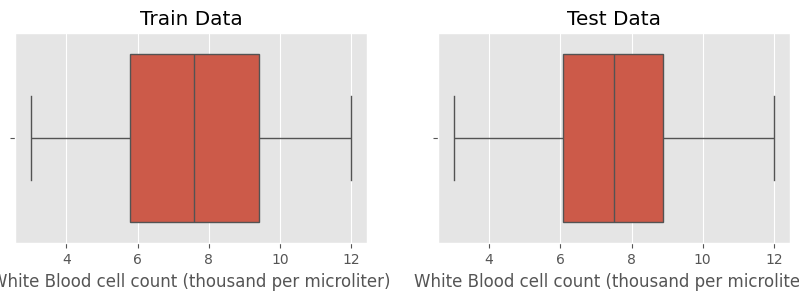

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace '-99' with NaN in test data
test["Birth defects"].replace('-99', np.nan, inplace=True)

# Define a function to fill missing values in Birth defects column
def fill_birth_defects(df):
    for i in range(len(df)):
        if pd.isnull(df['Birth defects'][i]):
            if df["Mother's age"][i] > 34:
                if df["H/O substance abuse"][i] == 'Yes':
                    df.loc[i, 'Birth defects'] = 'Multiple'
                else:
                    df.loc[i, 'Birth defects'] = 'Singular'
            else:
                df.loc[i, 'Birth defects'] = 'Singular'
    return df

# Fill missing values in Birth defects column for both train and test data
train = fill_birth_defects(train)
test = fill_birth_defects(test)

# Replace -99 with NaN in test data for White Blood cell count column
test["White Blood cell count (thousand per microliter)"].replace(-99, np.nan, inplace=True)

# Convert White Blood cell count column to numeric type
train["White Blood cell count (thousand per microliter)"] = pd.to_numeric(train["White Blood cell count (thousand per microliter)"], errors='coerce')
test["White Blood cell count (thousand per microliter)"] = pd.to_numeric(test["White Blood cell count (thousand per microliter)"], errors='coerce')

# Fill missing values in White Blood cell count column with mean
train["White Blood cell count (thousand per microliter)"].fillna(train["White Blood cell count (thousand per microliter)"].mean(), inplace=True)
test["White Blood cell count (thousand per microliter)"].fillna(test["White Blood cell count (thousand per microliter)"].mean(), inplace=True)

# Plot boxplots to check for outliers
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='White Blood cell count (thousand per microliter)', data=train)
plt.title('Train Data')
plt.subplot(2, 2, 2)
sns.boxplot(x='White Blood cell count (thousand per microliter)', data=test)
plt.title('Test Data')
plt.show()


In [ ]:

## Understanding the Division of Genetic Disorders.
table3 = pd.pivot_table(train, index= ['Blood test result'],
                        values= 'White Blood cell count (thousand per microliter)', aggfunc= np.mean)
table3


,White Blood cell count (thousand per microliter)
Blood test result,
Blood test result,7.575339
abnormal,7.565855
inconclusive,7.569579
normal,7.613080
slightly abnormal,7.536552


In [ ]:
## train["Blood test result"].fillna('slightly abnormal', inplace= True)
## test["Blood test result"].fillna('slightly abnormal', inplace= True)

test["Blood test result"].replace('-99', np.nan, inplace= True)

# This loop is for test Data.
for i in range(0,21805):
    if (train['Blood test result'].isnull()[i] == True):
        if (5 < train["White Blood cell count (thousand per microliter)"][i] < 10):
          train['Blood test result'][i] = 'normal'
        elif (10 < train["White Blood cell count (thousand per microliter)"][i] < 1):
          train['Blood test result'][i] = 'abnormal'
        elif (1 < train["White Blood cell count (thousand per microliter)"][i] > 4):
          train['Blood test result'][i] = 'slightly abnormal'
        else:
            train['Blood test result'][i] = 'inconclusive'
    else:
      continue



# This loop is for Test Data.
for i in range(0,9465):
    if (test['Blood test result'].isnull()[i] == True):
        if (5 < test["White Blood cell count (thousand per microliter)"][i] < 10):
          test['Blood test result'][i] = 'normal'
        elif (10 < test["White Blood cell count (thousand per microliter)"][i] < 1):
          test['Blood test result'][i] = 'abnormal'
        elif (1 < test["White Blood cell count (thousand per microliter)"][i] > 4):
          test['Blood test result'][i] = 'slightly abnormal'
        else:
            test['Blood test result'][i] = 'inconclusive'
    else:
      continue

<ipython-input-46-5657f7555807>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Blood test result'][i] = 'normal'
<ipython-input-46-5657f7555807>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Blood test result'][i] = 'slightly abnormal'
<ipython-input-46-5657f7555807>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Blood test result'][i] = 'inconclusive'
<ipython-input-46-5657f7555807>:26: SettingWithCopyWa

**categotical encoding**

In [ ]:
# Obtaining the Categorical Columns
categorical_features_test = [features for features in test.columns if test[features].dtypes == 'O']

In [ ]:
# Obtaining the Categorical Columns
categorical_features_train = [features for features in train.columns if train[features].dtypes == 'O']
for feature in categorical_features_train:
    print(feature)

Patient Age
Genes in mother's side
Inherited from father
Maternal gene
Paternal gene
Blood cell count (mcL)
Patient First Name
Family Name
Father's name
Institute Name
Location of Institute
Status
Respiratory Rate (breaths/min)
Heart Rate (rates/min
Parental consent
Follow-up
Gender
Birth asphyxia
Autopsy shows birth defect (if applicable)
Place of birth
Folic acid details (peri-conceptional)
H/O serious maternal illness
H/O radiation exposure (x-ray)
H/O substance abuse
Assisted conception IVF/ART
History of anomalies in previous pregnancies
No. of previous abortion
Birth defects
Blood test result
Symptom 1
Symptom 2
Symptom 3
Symptom 4
Symptom 5
Genetic Disorder
Disorder Subclass


In [ ]:
# Obtaining the Categorical Columns in test DataFrame
categorical_features_test = [feature for feature in test.columns if test[feature].dtype == 'O']

# Display the list of categorical columns
print("Categorical Columns in test DataFrame:")
for feature in categorical_features_test:
    print(feature)


Categorical Columns in test DataFrame:
Patient Id
Genes in mother's side
Inherited from father
Maternal gene
Paternal gene
Patient First Name
Family Name
Father's name
Institute Name
Location of Institute
Status
Respiratory Rate (breaths/min)
Parental consent
Follow-up
Gender
Birth asphyxia
Autopsy shows birth defect (if applicable)
Place of birth
Folic acid details (peri-conceptional)
H/O serious maternal illness
H/O radiation exposure (x-ray)
H/O substance abuse
Assisted conception IVF/ART
History of anomalies in previous pregnancies
Birth defects
Blood test result


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
for feature in categorical_features:
    ## Encode labels in all Categorical Columns.
    train[feature]= label_encoder.fit_transform(train[feature])



for features in categorical_features_test:
    ## Encode labels in all Categorical Columns.
    test[features]= label_encoder.fit_transform(test[features])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Obtaining the Categorical Columns
categorical_features = [features for features in train.columns if train[features].dtypes == 'O']
categorical_features


[]

In [ ]:
## Dropping all Unnecessary Columns
train.drop(columns= ['Patient Id', 'Place of birth', 'H/O serious maternal illness', 'Patient First Name', 'Family Name', "Father's name", "Status", "Parental consent", "Follow-up",
                     'Institute Name', 'Location of Institute'], inplace= True)

test.drop(columns= ['Patient Id', 'Place of birth', 'Patient First Name', 'Family Name', "Father's name", "Status", "Parental consent", "Follow-up",
                     'Institute Name', 'Location of Institute'], inplace= True)

In [ ]:
train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Respiratory Rate (breaths/min),Heart Rate (rates/min,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,15,2,1,2,0,6750,35.0,42.0,0,0,0,1,2,1,1,1,1,2,0,2,9.857562,4,3,3,3,3,3,1,6
1,19,2,2,1,0,13877,35.0,23.0,2,1,0,1,1,2,1,1,1,2,0,1,5.522560,4,3,5,3,3,1,5,2
2,23,2,1,1,0,12959,41.0,22.0,0,0,0,2,2,2,2,1,2,2,9,2,7.575339,4,1,3,3,3,3,2,3
3,9,2,1,2,0,4702,21.0,42.0,2,1,3,2,1,1,1,1,1,2,3,2,7.919321,2,1,1,3,1,1,1,7
4,7,2,1,3,2,5224,32.0,42.0,2,1,3,2,2,1,1,1,2,1,9,1,4.098210,5,1,1,1,1,5,2,1


In [ ]:
target = train[['Genetic Disorder', 'Disorder Subclass']]
target["Genetic Disorder"] = target["Genetic Disorder"].astype('category').cat.codes
target["Disorder Subclass"] = target["Disorder Subclass"].astype('category').cat.codes

target

<ipython-input-64-ea120531b595>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target["Genetic Disorder"] = target["Genetic Disorder"].astype('category').cat.codes
<ipython-input-64-ea120531b595>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target["Disorder Subclass"] = target["Disorder Subclass"].astype('category').cat.codes


,Genetic Disorder,Disorder Subclass
0,1,6
1,5,2
2,2,3
3,1,7
4,2,1
...,...,...
26079,3,9
26080,3,9
26081,3,9
26082,3,9


In [ ]:
#remove duplicates
train.drop_duplicates(inplace=True)

train

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Respiratory Rate (breaths/min),Heart Rate (rates/min,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,15,2,1,2,0,6750,35.0,42.0,0,0,0,1,2,1,1,1,1,2,0,2,9.857562,4,3,3,3,3,3,1,6
1,19,2,2,1,0,13877,35.0,23.0,2,1,0,1,1,2,1,1,1,2,0,1,5.522560,4,3,5,3,3,1,5,2
2,23,2,1,1,0,12959,41.0,22.0,0,0,0,2,2,2,2,1,2,2,9,2,7.575339,4,1,3,3,3,3,2,3
3,9,2,1,2,0,4702,21.0,42.0,2,1,3,2,1,1,1,1,1,2,3,2,7.919321,2,1,1,3,1,1,1,7
4,7,2,1,3,2,5224,32.0,42.0,2,1,3,2,2,1,1,1,2,1,9,1,4.098210,5,1,1,1,1,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26079,24,2,2,2,2,17517,35.0,42.0,0,0,0,1,2,2,1,1,1,2,6,2,10.139913,4,2,2,2,5,0,3,9
26080,12,1,2,2,0,2603,18.0,44.0,2,1,3,2,1,1,1,1,1,2,2,2,4.586272,1,2,2,2,2,0,3,9
26081,31,2,1,1,2,12791,30.0,28.0,0,0,0,2,2,2,1,1,2,2,4,2,8.451248,4,0,0,0,0,2,3,9
26082,6,2,2,3,0,8545,20.0,45.0,0,0,0,2,1,2,2,1,3,1,2,2,6.852721,2,2,2,2,2,2,3,9


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

# Convert normalized DataFrame to CSV
csv_data = train.to_csv(index=False)

# Write CSV data to a file
csv_filename = 'normalized_data.csv'
with open(csv_filename, 'w') as f:
    f.write(csv_data)

print("Normalized data has been saved to:", csv_filename)
files.download(csv_filename)

Normalized data has been saved to: normalized_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#dropping target variables
train = train.drop(['Genetic Disorder', 'Disorder Subclass'], axis = 1)

In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)

data_norm

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Respiratory Rate (breaths/min),Heart Rate (rates/min,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,0.142857,1.0,0.0,0.5,0.0,0.384582,0.515152,0.500000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.5,0.00,0.5,0.761951,0.50,1.0,1.0,1.0,1.0,1.0
1,0.285714,1.0,0.5,0.0,0.0,0.509848,0.515152,0.068182,0.5,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.5,0.00,0.0,0.280284,0.50,1.0,NaN,1.0,1.0,0.0
2,0.428571,1.0,0.0,0.0,0.0,0.495347,0.696970,0.045455,0.0,0.5,0.0,0.5,0.333333,1.0,1.0,0.0,0.5,0.5,1.00,0.5,0.498469,0.50,0.0,1.0,1.0,1.0,1.0
3,0.857143,1.0,0.0,0.5,0.0,0.338402,0.090909,0.500000,0.5,0.0,1.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.5,0.25,0.5,0.546591,0.25,0.0,0.0,1.0,0.0,0.0
4,0.785714,1.0,0.0,0.5,1.0,0.351276,0.424242,0.500000,0.5,0.5,1.0,0.5,0.333333,0.0,0.0,0.0,0.5,0.0,1.00,0.0,0.122023,0.75,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,0.285714,1.0,0.5,0.5,0.0,0.800028,0.515152,1.000000,0.0,0.5,0.5,0.0,0.000000,0.0,0.0,0.0,0.5,0.0,0.75,0.0,0.398312,0.25,0.0,0.0,1.0,0.0,0.0
22079,0.571429,0.0,0.5,0.0,1.0,0.562897,0.515152,0.818182,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.5,0.0,0.50,0.0,0.449062,0.25,1.0,1.0,1.0,1.0,0.0
22080,0.571429,1.0,0.0,0.5,0.0,0.740071,0.515152,0.704545,0.5,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.50,0.5,0.523940,0.50,0.0,0.0,0.0,1.0,NaN
22081,0.500000,1.0,0.0,0.5,1.0,0.466336,0.030303,0.500000,0.5,0.5,1.0,0.5,0.333333,1.0,0.0,1.0,0.5,0.0,0.25,0.0,0.604186,0.00,1.0,1.0,1.0,0.0,0.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

# Convert normalized DataFrame to CSV
csv_data = data_norm.to_csv(index=False)

# Write CSV data to a file
csv_filename = 'normalized_data.csv'
with open(csv_filename, 'w') as f:
    f.write(csv_data)

print("Normalized data has been saved to:", csv_filename)
files.download(csv_filename)


Normalized data has been saved to: normalized_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = data_norm.to_numpy()[:10000]
Y = target.to_numpy()[:10000]

#split dataset: 80% for train set and 20% for test set
num_of_rows = int(len(X) * 0.8)
X_train = X[:num_of_rows]
X_test = X[num_of_rows:]

#splitting target variables
Y_train = Y[:num_of_rows]
Y_train_1 = Y_train[:, -2] #for Genetic Disorder
Y_train_2 = Y_train[:, -1] #for Disorder Subclass

Y_test = Y[num_of_rows:]
Y_test_1 = Y_test[:, -2]
Y_test_2 = Y_test[:, -1]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
train_data = pd.read_csv('normalized_data.csv')
train_ini = train_data.drop(['Genetic Disorder', 'Disorder Subclass'], axis = 1)
train = train_ini.drop(['Maternal gene','Paternal gene','Mother\'s age','Father\'s age','Heart Rate (rates/min','Birth asphyxia','Folic acid details (peri-conceptional)','White Blood cell count (thousand per microliter)'], axis = 1)
target = train_data[['Genetic Disorder', 'Disorder Subclass']]
target = target.copy()

# Convert "Genetic Disorder" column to category type and encode it
target.loc[:, "Genetic Disorder"] = target.loc[:, "Genetic Disorder"].astype('category').cat.codes

# Convert "Disorder Subclass" column to category type and encode it
target.loc[:, "Disorder Subclass"] = target.loc[:, "Disorder Subclass"].astype('category').cat.codes
X = train.to_numpy()
y = target.to_numpy()

#split dataset: 80% for train set and 20% for test set
num_of_rows = int(len(X) * 0.8)
X_train = X[:num_of_rows]
X_test = X[num_of_rows:]

#splitting target variables
Y_train = y[:num_of_rows]
Y_train_1 = Y_train[:, -2] #for Genetic Disorder
Y_train_2 = Y_train[:, -1] #for Disorder Subclass

Y_test = y[num_of_rows:]
Y_test_1 = Y_test[:, -2]
Y_test_2 = Y_test[:, -1]

clf1 = SVC(gamma="scale")
clf1.fit(X_train, Y_train_1)

clf2 = SVC(gamma="scale")
clf2.fit(X_train, Y_train_2)

# Evaluate accuracy using the selected features
y_pred1 = clf1.predict(X_test)
accuracy_genetic_algorithm1 = accuracy_score(Y_test_1, y_pred1)

y_pred2 = clf2.predict(X_test)
accuracy_genetic_algorithm2 = accuracy_score(Y_test_2, y_pred2)

print("Accuracy after SVM (Genetic Disorder):", accuracy_genetic_algorithm1)
print("Accuracy after SVM (Genetic Disorder):", accuracy_genetic_algorithm1)

<ipython-input-68-5ed33e68bedc>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  target.loc[:, "Genetic Disorder"] = target.loc[:, "Genetic Disorder"].astype('category').cat.codes
<ipython-input-68-5ed33e68bedc>:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  target.loc[:, "Disorder Subclass"] = target.loc[:, "Disorder Subclass"].astype('category').cat.codes


Accuracy after SVM (Genetic Disorder): 0.11175004792026069
Accuracy after SVM (Genetic Disorder): 0.11175004792026069


In [ ]:
'''import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from xgboost import XGBClassifier



# Generate a random dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to initialize the population with random chromosomes
def initialize_population(population_size, chromosome_length):
    return np.random.randint(2, size=(population_size, chromosome_length))

# Function to evaluate the fitness of each chromosome using XGBoost classifier
def calculate_fitness(chromosomes, X_train, y_train, X_test, y_test):
    fitness = []

    for chromosome in chromosomes:
        selected_features = [i for i in range(len(chromosome)) if chromosome[i] == 1]
        if not selected_features:
            fitness.append(0)  # Avoid all-zero chromosomes
        else:
            clf = XGBClassifier(random_state=42)
            clf.fit(X_train[:, selected_features], y_train)
            y_pred = clf.predict(X_test[:, selected_features])
            fitness.append(accuracy_score(y_test, y_pred))

    return np.array(fitness)

# Function to perform crossover operation
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Function to perform mutation operation
def mutate(chromosome, mutation_rate):
    mutation_mask = np.random.rand(len(chromosome)) < mutation_rate
    chromosome[mutation_mask] = 1 - chromosome[mutation_mask]
    return chromosome

# Function to select the next generation based on tournament selection
def select_next_generation(chromosomes, fitness, tournament_size):
    selected_indices = []

    for _ in range(len(chromosomes)):
        tournament_candidates = np.random.choice(len(chromosomes), size=tournament_size, replace=False)
        tournament_fitness = fitness[tournament_candidates]
        winner_index = tournament_candidates[np.argmax(tournament_fitness)]
        selected_indices.append(winner_index)

    return chromosomes[selected_indices]

# Main genetic algorithm function
def genetic_algorithm(X_train, y_train, X_test, y_test, population_size=50, generations=50, crossover_rate=0.8, mutation_rate=0.1, tournament_size=3):
    chromosome_length = X_train.shape[1]
    population = initialize_population(population_size, chromosome_length)

    for generation in range(generations):
        fitness = calculate_fitness(population, X_train, y_train, X_test, y_test)

        # Select parents using tournament selection
        parents = select_next_generation(population, fitness, tournament_size)

        # Perform crossover
        crossover_indices = np.random.rand(len(parents)) < crossover_rate
        crossover_parents = parents[crossover_indices]

        # Ensure that crossover_parents has an even length
        if len(crossover_parents) % 2 != 0:
            crossover_parents = crossover_parents[:-1]

        crossover_children = np.empty_like(crossover_parents)

        for i in range(0, len(crossover_parents), 2):
            crossover_children[i], crossover_children[i + 1] = crossover(crossover_parents[i], crossover_parents[i + 1])

        # Perform mutation
        mutation_indices = np.random.rand(len(crossover_children)) < mutation_rate
        crossover_children[mutation_indices] = mutate(crossover_children[mutation_indices], mutation_rate)

        # Replace old population with new population
        population[:len(crossover_children)] = crossover_children

    # Get the best chromosome from the final population
    best_chromosome = population[np.argmax(fitness)]

    return best_chromosome

# Example usage
best_chromosome = genetic_algorithm(X_train, y_train, X_test, y_test)

# Display selected features based on the best chromosome
selected_features_genetic_algorithm = [i for i in range(len(best_chromosome)) if best_chromosome[i] == 1]
print("Selected Features based on Genetic Algorithm:")
print(selected_features_genetic_algorithm)

# Evaluate accuracy using the selected features
clf = XGBClassifier(random_state=42)
clf.fit(X_train[:, selected_features_genetic_algorithm], y_train)
y_pred = clf.predict(X_test[:, selected_features_genetic_algorithm])
accuracy_genetic_algorithm = accuracy_score(y_test, y_pred)

print("Accuracy after Genetic Algorithm:", accuracy_genetic_algorithm)



Selected Features based on Genetic Algorithm:
[0, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 16, 18, 19]
Accuracy after Genetic Algorithm: 0.945


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
import numpy as np
np.random.seed(42)  # Set random seed for reproducibility


# Generate a random dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to initialize the population with random chromosomes
def initialize_population(population_size, chromosome_length):
    return np.random.randint(2, size=(population_size, chromosome_length))

# Function to evaluate the fitness of each chromosome using XGBoost classifier
def calculate_fitness(chromosomes, X_train, y_train, X_test, y_test):
    fitness = []

    for chromosome in chromosomes:
        selected_features = [i for i in range(len(chromosome)) if chromosome[i] == 1]
        if not selected_features:
            fitness.append(0)  # Avoid all-zero chromosomes
        else:
            clf = XGBClassifier(random_state=42)
            clf.fit(X_train[:, selected_features], y_train)
            y_pred = clf.predict(X_test[:, selected_features])
            fitness.append(accuracy_score(y_test, y_pred))

    return np.array(fitness)

# Function to perform crossover operation
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Function to perform mutation operation
def mutate(chromosome, mutation_rate):
    mutation_mask = np.random.rand(len(chromosome)) < mutation_rate
    chromosome[mutation_mask] = 1 - chromosome[mutation_mask]
    return chromosome

# Function to select the next generation based on tournament selection
def select_next_generation(chromosomes, fitness, tournament_size):
    selected_indices = []

    for _ in range(len(chromosomes)):
        tournament_candidates = np.random.choice(len(chromosomes), size=tournament_size, replace=False)
        tournament_fitness = fitness[tournament_candidates]
        winner_index = tournament_candidates[np.argmax(tournament_fitness)]
        selected_indices.append(winner_index)

    return chromosomes[selected_indices]

# Main genetic algorithm function
def genetic_algorithm(X_train, y_train, X_test, y_test, population_size=50, generations=50, crossover_rate=0.8, mutation_rate=0.1, tournament_size=3):
    chromosome_length = X_train.shape[1]
    population = initialize_population(population_size, chromosome_length)

    for generation in range(generations):
        fitness = calculate_fitness(population, X_train, y_train, X_test, y_test)

        # Select parents using tournament selection
        parents = select_next_generation(population, fitness, tournament_size)

        # Perform crossover
        crossover_indices = np.random.rand(len(parents)) < crossover_rate
        crossover_parents = parents[crossover_indices]

        # Ensure that crossover_parents has an even length
        if len(crossover_parents) % 2 != 0:
            crossover_parents = crossover_parents[:-1]

        crossover_children = np.empty_like(crossover_parents)

        for i in range(0, len(crossover_parents), 2):
            crossover_children[i], crossover_children[i + 1] = crossover(crossover_parents[i], crossover_parents[i + 1])

        # Perform mutation
        mutation_indices = np.random.rand(len(crossover_children)) < mutation_rate
        crossover_children[mutation_indices] = mutate(crossover_children[mutation_indices], mutation_rate)

        # Replace old population with new population
        population[:len(crossover_children)] = crossover_children

    # Get the best chromosome from the final population
    best_chromosome = population[np.argmax(fitness)]

    return best_chromosome

# Example usage
best_chromosome = genetic_algorithm(X_train, y_train, X_test, y_test)

# Display selected features based on the best chromosome
selected_features_genetic_algorithm = [i for i in range(len(best_chromosome)) if best_chromosome[i] == 1]
print("Selected Features based on Genetic Algorithm:")
print(selected_features_genetic_algorithm)

# Evaluate accuracy using the selected features
clf = XGBClassifier(random_state=42)
clf.fit(X_train[:, selected_features_genetic_algorithm], y_train)
y_pred = clf.predict(X_test[:, selected_features_genetic_algorithm])
accuracy_genetic_algorithm = accuracy_score(y_test, y_pred)

print("Accuracy after Genetic Algorithm:", accuracy_genetic_algorithm)



Selected Features based on Genetic Algorithm:
[0, 2, 5, 6, 7, 10, 11, 12, 13, 15, 16, 17, 18, 19]
Accuracy after Genetic Algorithm: 0.945


In [ ]:
def predict_disorder(clf, selected_features):
    # Dictionary mapping disorder class labels to their names
    disorder_labels = {0: "Mitochondrial genetic inheritance disorder", 1: "Multifactorial genetic inheritance disorder", 2:"Single gene inheritance diseases" ,3:"Not Classified"}  # Update with your actual labels

    # Dictionary mapping disorder subclass labels to their names
    subclass_labels = {0: "Alzheimer's", 1: "Cancer", 2:"Cystic Fibrosis" ,3:"Diabetes", 4:"Hemochromatosis",5:"Lebers Hereditary Optic Neuropathy",6:"Leigh Syndrome",7:"Mitochondrial Myopathy",8:"Tay Sachs"}  # Update with your actual subclass labels

    feature_values = []
    for feature_index in selected_features:
        value = float(input(f"Enter value for feature {feature_index}: "))
        feature_values.append(value)

    feature_vector = np.array(feature_values).reshape(1, -1)

    # Predict the disorder class and subclass
    disorder_class = clf.predict(feature_vector)[0]
    disorder_subclass = clf.predict_proba(feature_vector)[0]

    print("Predicted Disorder:", disorder_labels[disorder_class])
    print("Predicted Disorder Subclass:", subclass_labels[np.argmax(disorder_subclass)])

# Example usage:
predict_disorder(clf, selected_features_genetic_algorithm)

Enter value for feature 0: 2
Enter value for feature 2: 0
Enter value for feature 5: 4.76
Enter value for feature 6: 35
Enter value for feature 7: 42
Enter value for feature 10: 0
Enter value for feature 11: 0
Enter value for feature 12: 1
Enter value for feature 13: 0
Enter value for feature 15: 0
Enter value for feature 16: 0
Enter value for feature 17: 1
Enter value for feature 18: 0
Enter value for feature 19: 1
Predicted Disorder: Mitochondrial genetic inheritance disorder
